# Challenge 1

Welcome to Week 2’s challenge notebook! We’ll do two main things:

1. **Answer a few ML refresher questions** (multiple-choice style) from last week’s live knowledge check quiz. 
2. **Train a classifier** on the **Breast Cancer** dataset, achieving a good test accuracy. You can choose your classifier model from sklearn.

When you fill in this notebook and push it to GitHub, an external Pytest script will check:
- Whether your MCQ answers are correct  
- If your classifier’s test accuracy is above a certain threshold using a hidden dataset.

Section specific details and instructions are provided where necessary.

**Good luck!**

---

## Section 1: MCQ Functions

Below are **3 refresher questions** from last week’s ML basics. Each function has a TODO where you **return** the option choice from the `options` dictionary. All you need to do is to fill in the option number in the designated area.

**Example**:  
```python
options = {  
    1: 'option a',  
    2: 'option b',  
    3: 'option c'  
}  
  
return options[1]  
```

**Notes**:
- *If you fail to return the exact expected answer, autograding will fail the testcase.*  
- Each question states the options within the declared `options` dictionary or question text.

### Q1. "Which type of ML uses labeled data?"

**Options**:  
1. supervised
2. unsupervised
3. reinforcement

In [126]:
def answer_q1():
    """
    Q1: Which type of ML uses labeled data?
    """
    
    options = {
        1: "supervised",
        2: "unsupervised",
        3: "reinforcement"
    }

    # TODO: return the correct option number
    return options[1]

print(f'Q1: Which type of ML uses labeled data?\n'
      f'{answer_q1()} learning')

Q1: Which type of ML uses labeled data?
supervised learning



### Q2. "Which approach is typically used to *quantify* the difference between predicted outputs and actual labels?"

**Options**: 
1. accuracy metric
2. loss function
3. gradient descent

In [127]:
def answer_q2():
    """
    Q2: Which approach is typically used to quantify the difference
        between predicted outputs and actual labels?
    """
    options = {
        1: "accuracy metric",
        2: "loss function",
        3: "gradient descent"
    }
    
    # TODO: return the correct option number
    return options[2]

print(f'Q2: Which approach is typically used to measure differences between predictions and actual labels?\n'
      f'{answer_q2()}')


Q2: Which approach is typically used to measure differences between predictions and actual labels?
loss function


### Q3. "What best distinguishes classification from regression?"

**Options**:
1. Regression => continuous, Classification => discrete
2. Both produce continuous outputs
3. Regression => discrete, Classification => continuous

In [128]:
def answer_q3():
    """
    Q3: What best distinguishes classification from regression?
    """
    options = {
        1: "Regression => continuous, Classification => discrete",
        2: "Both produce continuous outputs",
        3: "Regression => discrete, Classification => continuous"
    }
    
    # TODO: return the correct option number
    return options[1]

print(f'Q3: What best distinguishes classification from regression?\n'
      f'{answer_q3()}')


Q3: What best distinguishes classification from regression?
Regression => continuous, Classification => discrete


---

## Section 2: Code challenge

To pass this section of the weekly challenge, uncomment/fill in code where necessary (marked with a 'TODO:' comment).

### 1. House keeping and imports

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# TODO: Import your classifier model of choice below.
# Example:
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC

# The above is just an example, feel free to use any classifier like DecisionTreeClassifier, LogisticRegression, etc. based on your results and experimentation.

SEED = 42


### 2. Load and Inspect the Breast Cancer Dataset

In [130]:


def load_cancer_data():
    """
    Loads breast cancer dataset from sklearn.
    Returns X (np.array), y (np.array), and feature_names (list)
    """
    
    cancer_dataframe = pd.read_csv('breast_cancer.csv') # loading the dataset from a CSV file into a pandas DataFrame
    X = cancer_dataframe.drop('target', axis=1).values # Selecting all columns except the target column.
    
    # If you want to select specific features (maybe some features are more correlated to the target than others), you can do so like this:
    X = cancer_dataframe[['mean radius', 'mean texture']].values

    y = cancer_dataframe['target'].values # Selecting the target column

    return X, y, cancer_dataframe

### Some useful visualisation examples for the dataset
Run the below code cells for examples of data visualisations that can help you understand the data and potentially help with feature selection should you choose to do that. 

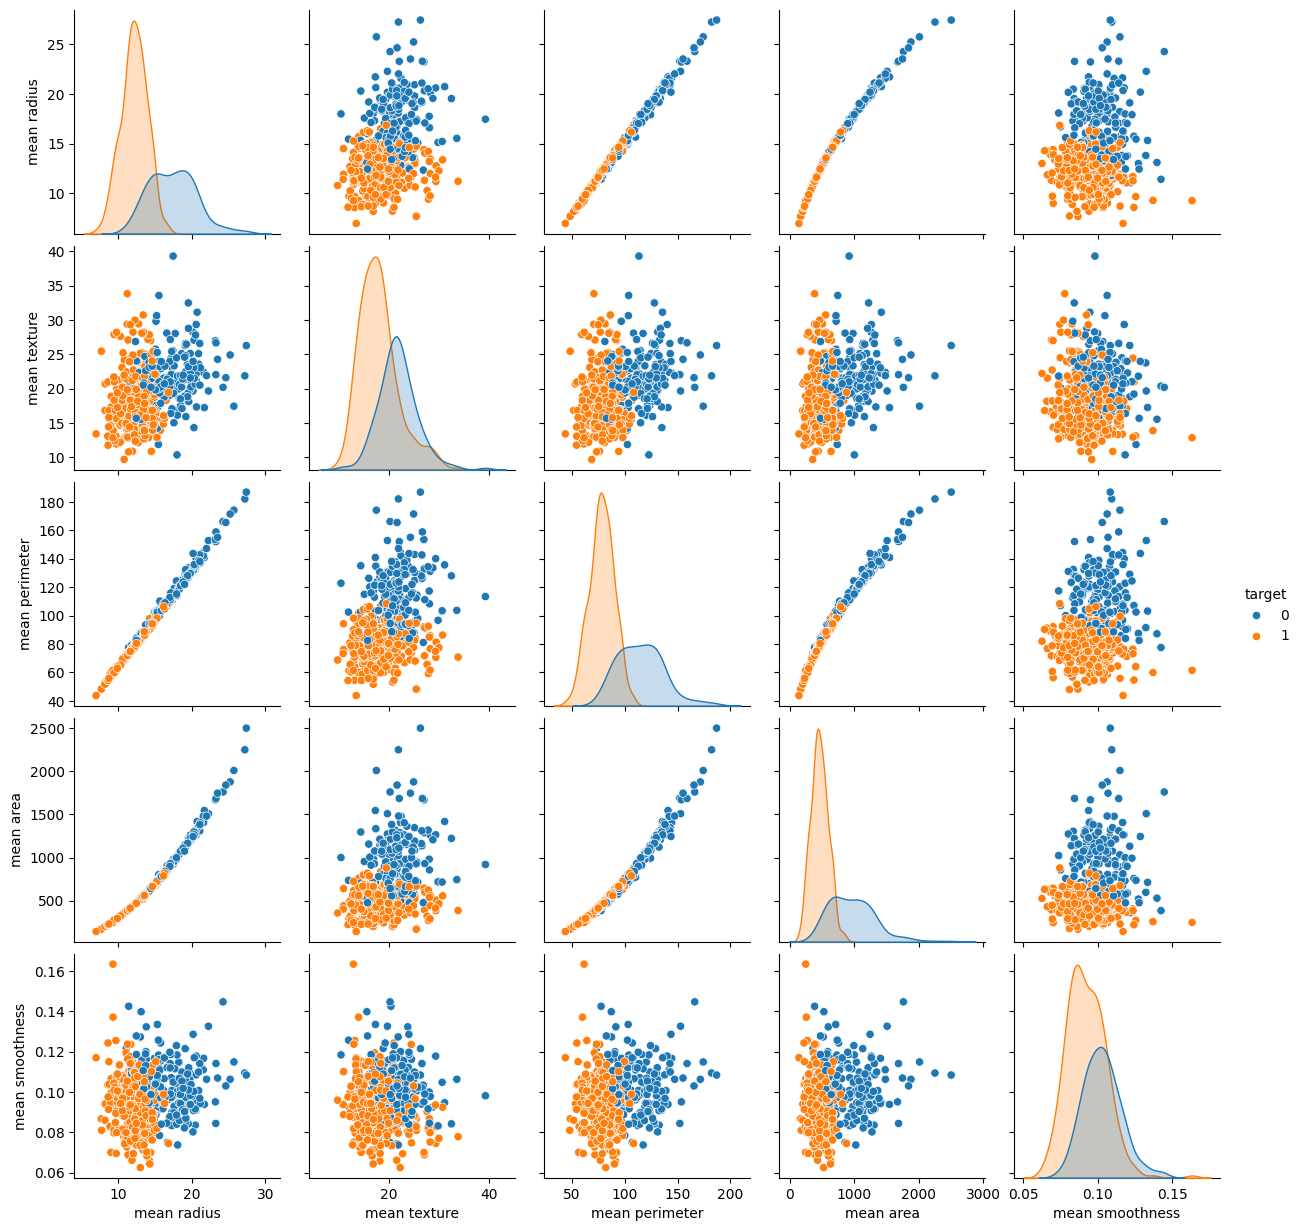

In [131]:
X_all, y_all, dataframe = load_cancer_data()

# Displaying the first 5 rows
dataframe.head()

# Define subset_cols
subset_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

sns.pairplot(dataframe[subset_cols + ["target"]], hue="target")
plt.show()



The dataframe has:

- data: shape (500, 30) i.e., 500 rows or data points and 30 columns or features.
- target: shape (500,) with 0 or 1 (malignant vs. benign).

The specification of each column and common metadata of the dataframe can be seen below.

In [132]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              500 non-null    float64
 1   mean texture             500 non-null    float64
 2   mean perimeter           500 non-null    float64
 3   mean area                500 non-null    float64
 4   mean smoothness          500 non-null    float64
 5   mean compactness         500 non-null    float64
 6   mean concavity           500 non-null    float64
 7   mean concave points      500 non-null    float64
 8   mean symmetry            500 non-null    float64
 9   mean fractal dimension   500 non-null    float64
 10  radius error             500 non-null    float64
 11  texture error            500 non-null    float64
 12  perimeter error          500 non-null    float64
 13  area error               500 non-null    float64
 14  smoothness error         5

#### Simple correlation heatmap of a subset

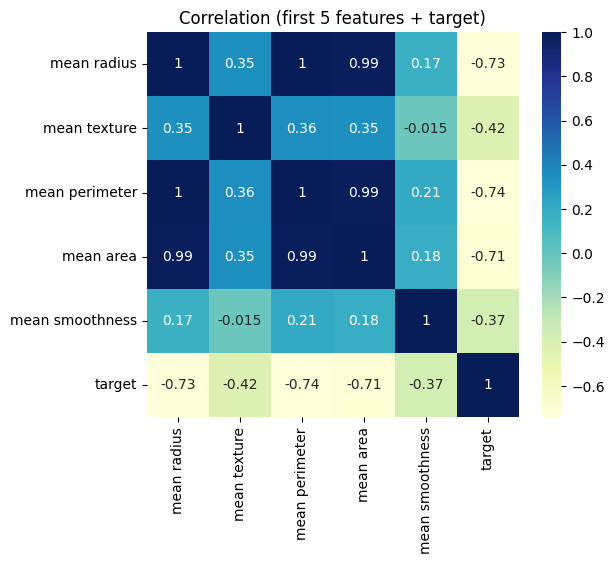

In [133]:

subset_cols = list(dataframe.columns[:5])
corr = dataframe[subset_cols + ["target"]].corr()
# Example heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation (first 5 features + target)")
plt.show()

#### Scatter plot of two features

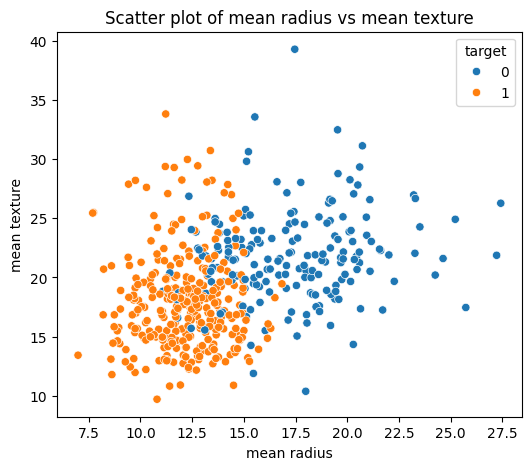

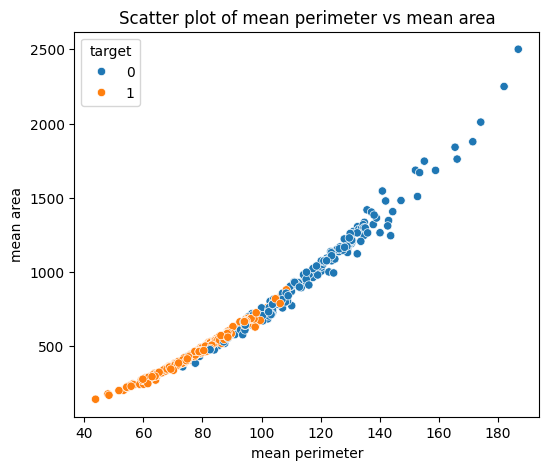

In [134]:
# Example scatter plot
plt.figure(figsize=(6,5))
sns.scatterplot(data=dataframe, x="mean radius", y="mean texture", hue="target")
plt.title("Scatter plot of mean radius vs mean texture")
plt.show()
# Example scatter plot for another pair of features
plt.figure(figsize=(6,5))
sns.scatterplot(data=dataframe, x="mean perimeter", y="mean area", hue="target")
plt.title("Scatter plot of mean perimeter vs mean area")
plt.show()

Feel free to explore and visualise the dataset to help you understand the data better. 

**Note:** Data exploration is not graded for this assignment.


### 3. Train a Classifier

We want a function `train_cancer_classifier()` that:

1. Loads `(X, y)`
2. Splits into train/test.
3. Trains a simple **classifier model**.
4. Returns trained `model`.


In [135]:
def train_cancer_classifier(test_size=0.2, random_state=42):
    """
    1. load data (X, y)
    2. split (train/test)
    3. train classifier model
    4. return model
    """
    # Load data
    cancer_dataframe = pd.read_csv('breast_cancer.csv')
    X = cancer_dataframe.drop('target', axis=1).values
    y = cancer_dataframe['target'].values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create the model
    model = LogisticRegression(max_iter=500, random_state=random_state)

    # Train the model
    model.fit(X_train, y_train)

    return model

### 4. Predict Function

Given a trained `model`, test data `X_test` and corresponding target labels `y_test`, we want to output class predictions (0 or 1).

**Note**: This function will be used to test your model on a hidden dataset during autograding (completing this function is SUPER IMPORTANT!). So, your accuracy with the hidden dataset will determine the testcase result. The accuracy to beat is <INSERT TARGET ACCURACY SCORE>.

In [136]:
def predict_cancer(model, X_test, y_test):
  
    # Predict on X_test
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return y_pred, accuracy

### 5. Test model

Once finished, you can test your model by running the below code cell.

In [137]:
# Load data
X, y, _ = load_cancer_data()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Train the model
model = LogisticRegression(random_state=SEED)
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred, accuracy = predict_cancer(model, X_test, y_test)

print(f"Model's test accuracy: {accuracy}")

Model's test accuracy: 0.89



### End of Notebook

Push your code. The autograder test script will do:
1. Check all three MCQ functions' return values and pass/fail each test case
2. `train_cancer_classifier()`
3. Load the hidden dataset
4. Evaluate your model on that hidden set
5. Pass/fail if accuracy surpasses a threshold

If you've made it this far successfully, congratulations on completing your first challenge assignment! :)